In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-k85acdmn because the default path (/home/juliosouza/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data = pd.read_csv("test_scores.csv")

In [3]:
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


There are a lot of the data that is strings that needs to be converted into number. 

Maybe student_id might be not be usefull afterwards.

In [5]:
#Remove the variable student_id which is not usefull
data = data.drop(columns=['student_id'])

In [6]:
#The data is transformed into categorical.
for col in ['school' ,'school_setting', 'school_type', 'classroom', 'teaching_method', 'gender', 'lunch']:
    data[col] = data[col].astype('category')


In [7]:
#enconding the data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in ['school' , 'school_setting', 'school_type', 'classroom', 'teaching_method', 'gender', 'lunch']:
    le.fit(data[col])
    data[col] = le.transform(data[col])
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,0,2,0,22,1,20.0,0,0,62.0,72.0
1,0,2,0,22,1,20.0,0,0,66.0,79.0
2,0,2,0,22,1,20.0,1,0,64.0,76.0
3,0,2,0,22,1,20.0,0,0,61.0,77.0
4,0,2,0,22,1,20.0,1,0,64.0,76.0


In [8]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
train,test = split_train_test(data, 0.2)
x_test = test.drop('posttest',axis = 1)
x_train = train.drop('posttest',axis = 1)
y_test = test['posttest'].values
y_train = train['posttest'].values

Before analyse the feature, lets use all data to predict the students score.

Let's use linear Regretion

<AxesSubplot:>

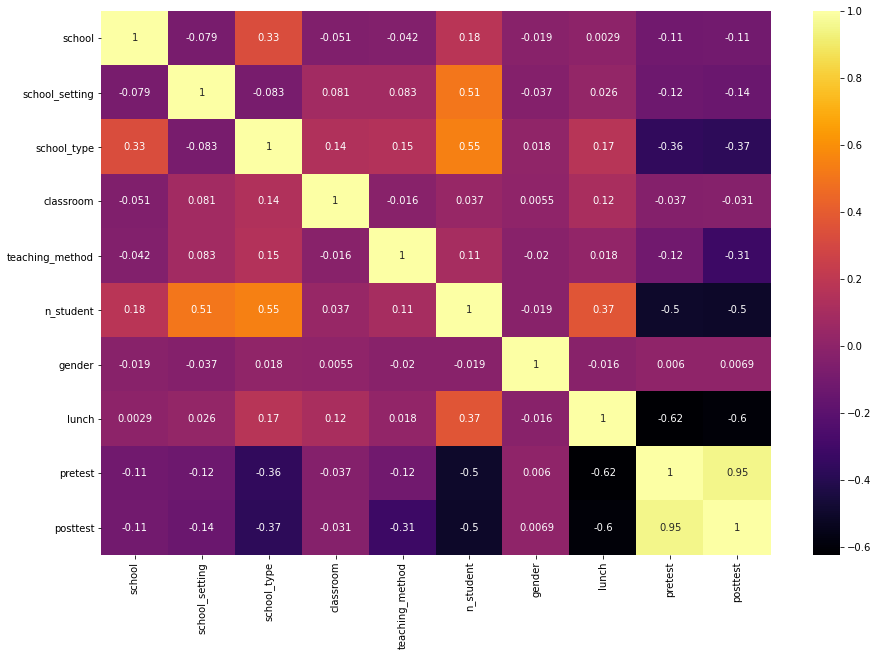

In [9]:
#Check the correlation betweem the features
import seaborn as sns
# Correlation matrix for dataset
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap="inferno")

In [10]:
#Function to select the training and test data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
reg = LinearRegression().fit(scaler.fit_transform(x_train[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]]), y_train)
predictions = reg.predict(scaler.fit_transform(x_test[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]]))

errors = mean_squared_error(predictions,y_test)
print(errors)
tree_rmse = np.sqrt(errors)
print(tree_rmse)
print(predictions)

10.723891040410441
3.274735262644973
[78.4297536  73.32718167 63.05932218 87.39856498 83.89056743 87.52647578
 79.48230516 64.64358039 57.77434455 54.53085826 65.42256862 45.39610313
 82.54571408 75.49121815 77.14008588 51.32421563 53.96854253 43.70296124
 70.97220892 60.24784771 63.69971096 72.7427786  63.2698506  76.26793999
 48.47166343 80.37134856 61.19171714 66.23051991 51.37924322 89.56053663
 87.80367854 56.37255683 69.33636099 47.64128704 90.43999809 59.08229332
 59.30240368 60.00877503 75.43619056 74.8222851  60.24784771 91.32152437
 61.40224555 74.31696465 70.39607008 51.1100478  76.93612035 53.85254483
 80.08179287 69.39939592 55.32000527 90.40377479 54.25649872 58.31288704
 80.15261126 92.68724683 93.95990874 61.57533566 58.80826209 69.79174656
 58.11251742 74.84108938 77.71717339 69.59175821 49.35112489 60.48671884
 72.98169323 56.1805044  49.51827247 91.26649678 65.19445092 93.04215916
 79.0083722  78.42354474 50.9369577  87.61756863 80.02676528 52.98109071
 69.69974856 5

In [11]:
#Function to select the training and test data
reg = LinearRegression().fit(x_train[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]], y_train)
predictions = reg.predict(x_test[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]])

errors = mean_squared_error(predictions,y_test)
print(errors)
tree_rmse = np.sqrt(errors)
print(tree_rmse)


10.040928833133327
3.1687424687300365


In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()


regr =  MLPRegressor(random_state=1, max_iter=1000)
regr.fit(scaler.fit_transform(x_train[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]]), y_train)
predictions = regr.predict(scaler.fit_transform((x_test[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]])))

errors = mean_squared_error(predictions,y_test)
print(errors)
tree_rmse = np.sqrt(errors)
print(tree_rmse)

11.384063102351725
3.3740277269684262


In [17]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor()
gbrt.fit(min_max_scaler.fit_transform(x_train[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]]), y_train)
predictions = gbrt.predict(min_max_scaler.fit_transform(x_test[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]]))

errors = mean_squared_error(np.round(predictions),y_test)
print(errors)
tree_rmse = np.sqrt(errors)
print(tree_rmse)

14.504694835680752
3.8085029651663334


In [14]:
gbrt = GradientBoostingRegressor()
gbrt.fit(x_train[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]], y_train)
predictions = gbrt.predict(x_test[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]])

errors = mean_squared_error(np.round(predictions),y_test)
print(errors)
tree_rmse = np.sqrt(errors)
print(tree_rmse)

9.95774647887324
3.1555897196678213


In [18]:
data.describe()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,11.264885,1.185654,0.741678,48.220816,0.643694,22.796531,0.504923,0.430380,54.955931,67.102203
std,6.516660,0.793525,0.437814,28.666968,0.479019,4.228893,0.500093,0.495245,13.563101,13.986789
min,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,22.000000,32.000000
25%,6.000000,1.000000,0.000000,24.000000,0.000000,20.000000,0.000000,0.000000,44.000000,56.000000
50%,11.000000,1.000000,1.000000,48.000000,1.000000,22.000000,1.000000,0.000000,56.000000,68.000000
75%,17.000000,2.000000,1.000000,74.000000,1.000000,27.000000,1.000000,1.000000,65.000000,77.000000
max,22.000000,2.000000,1.000000,96.000000,1.000000,31.000000,1.000000,1.000000,93.000000,100.000000


In [16]:
data.describe()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,11.264885,1.185654,0.741678,48.220816,0.643694,22.796531,0.504923,0.430380,54.955931,67.102203
std,6.516660,0.793525,0.437814,28.666968,0.479019,4.228893,0.500093,0.495245,13.563101,13.986789
min,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,22.000000,32.000000
25%,6.000000,1.000000,0.000000,24.000000,0.000000,20.000000,0.000000,0.000000,44.000000,56.000000
50%,11.000000,1.000000,1.000000,48.000000,1.000000,22.000000,1.000000,0.000000,56.000000,68.000000
75%,17.000000,2.000000,1.000000,74.000000,1.000000,27.000000,1.000000,1.000000,65.000000,77.000000
max,22.000000,2.000000,1.000000,96.000000,1.000000,31.000000,1.000000,1.000000,93.000000,100.000000
